# 통계적 추정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3
%matplotlib inline

In [3]:
df = pd.read_csv('data/ch4_scores400.csv')
print(df.head())

scores = np.array(df['score']) #모집단이라 가정
df.shape

   score
0     76
1     55
2     80
3     80
4     74


(400, 1)

In [4]:
#모평균, 모분산
p_mean = np.mean(scores)
p_var = np.var(scores)

p_mean, p_var

(69.53, 206.6691)

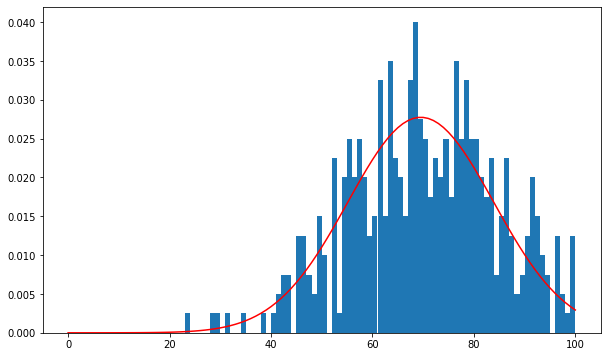

In [5]:
#모집단이 정규분포를 이룬다고 가정하여 추정 수행
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
xs = np.arange(101)

rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='red')
ax.hist(scores, bins=100, range=(0, 100), density=True)

plt.show()

In [6]:
#A학생이 무작위로 추출한 표본 크기가 20인 표본
np.random.seed(0)
n = 20 
sample = np.random.choice(scores, n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [7]:
#표본 크기가 20인 표본 10000개 추출
np.random.seed(1111)
n = 20 
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

## 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.(편향이 없다는 뜻)
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [17]:
df = pd.read_csv('data/ch4_scores400.csv')
p_mean = np.mean(scores)
p_var = np.var(scores)
print('모평균:', p_mean)
print('모분산:', p_var)

np.random.seed(1111)
n = 20 
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

sample_means = np.mean(samples, axis = 1)

#ddof = 1, 불편분산 
sample_u_vars = np.var(samples, axis=1, ddof=1) 
print('표본평균, 분산:', np.mean(sample_means),',', np.mean(sample_u_vars))

모평균: 69.53
모분산: 206.6691
표본평균, 분산: 69.53799999999998 , 206.67808263157895


In [18]:
df = pd.read_csv('data/ch4_scores400.csv')
p_mean = np.mean(scores)
print('모평균:', p_mean)

np.random.seed(1111)
n = 20 
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))
sample_means = np.mean(samples, axis = 1)

print('표본평균:', np.mean(sample_means))

모평균: 69.53
표본평균: 69.53799999999998


In [20]:
df = pd.read_csv('data/ch4_scores400.csv')

p_var = np.var(scores)
print('모분산:', p_var)

np.random.seed(1111)
n = 20 
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))



sample_u_vars = np.var(samples, axis=1) 
print('표본분산:', np.mean(sample_u_vars))

모분산: 206.6691
표본분산: 196.34417850000003


In [21]:
#ddof = 1, 불편분산 
sample_u_vars = np.var(samples, axis=1, ddof=1) 
print('표본분산:', np.mean(sample_u_vars))

표본분산: 206.67808263157895


In [9]:
#표본평균의 기댓값 = 모평균 
sample_means = np.mean(samples, axis = 1)
np.mean(sample_means)

69.53799999999998

In [13]:
#표본크기를 백만으로 할 때의 표본평균 - 얘는 하나의 표본의 표본의 크기가 1000만임 
np.mean(np.random.choice(scores, int(106)))

68.19811320754717

In [14]:
#A학생이 추출한 표본의 표본평균
np.random.seed(0)
n = 20 
sample = np.random.choice(scores, n)
sample

s_mean = np.mean(sample)
s_mean

70.4

In [23]:
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.08336592317

#### [ 20220905 과제]
- 다음 용어를 예를들어 설명하세요.
    불편성, 일치성, 불편분산 <br>
- 카이제곱분포, t분포가 구간 추정에 활용된 사례를 만들어 설명하세요.

# 통계적 가설검정

## 통계적 가설검정이란
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준


In [24]:
import numpy as np
import pandas as pd
from scipy import stats
%precision 3

'%.3f'

In [25]:
df = pd.read_csv('data/ch11_potato.csv')

df

,무게
0,122.02
1,131.73
2,130.60
3,131.82
4,132.05
5,126.12
6,124.43
7,132.89
8,122.79
9,129.95


In [26]:
#표본평균
sample = np.array(df['무게'])
s_mean = np.mean(sample)
s_mean

128.4507142857143

In [27]:
# 모평균이 알려진 감자튀김 무게 평균 130g 적은지 여부 - 단측 검정 
# 모집단이 정규분포를 따르고, 모분산은 9이다. 

rv = stats.norm(130, np.sqrt(9/14))
print(rv.mean(), rv.std(), '\n')
print(rv.rvs(10), '\n')
rv.isf(0.95)

130.0 0.8017837257372732 

[132.041 130.867 130.388 130.464 129.854 131.131 129.7   130.221 129.23
 130.302] 



128.68118313069039

<bound method _AxesBase.set_ylim of <AxesSubplot:xlabel='x', ylabel='pdf'>>

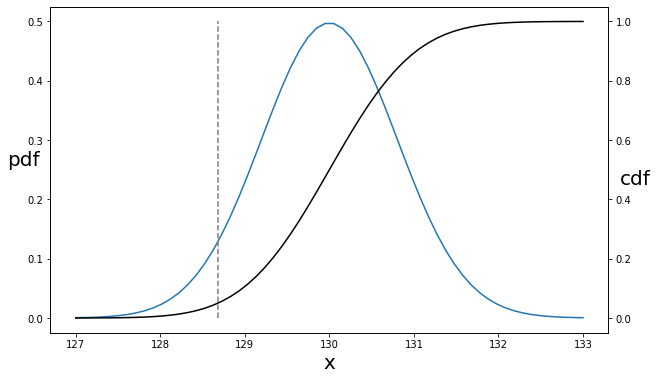

In [28]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)

ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='black')
ax1.vlines(rv.ppf(0.05), 0,0.5, color='gray',ls='--')
ax1.set_xlabel("x",fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20) 
ax1.set_ylim


- 검정통계량 vs 임계값 

In [29]:
# 검정통계량 z : 표본평균을 표준화
z = (s_mean - 130) / np.sqrt(9/14)
z

-1.932298779026813

In [30]:
#임계값 
rv = stats.norm()
rv.isf(0.95) #검정통계량값이 임계값보다 작으니까 기 각 

-1.6448536269514722

- p값 vs 유의수준(여기서는 0.05)

In [31]:
#검정통계량으로부터 p값 산출
#p값이 유의수준 0.05보다 작으므로 귀무가설 기각 
rv.cdf(z)

0.026661319523126635

### 단측검정과 양측검정
귀무가설 : 감자튀김의 무게는 130g이다.
- 단측검정 : 감자튀김의 무게가 130g보다 작다를 대립가설로 수행
- 양측검정 : 감자튀김의 무게는 130g이 아니다를 대립가설로 수행


In [32]:
z = (s_mean - 130) / np.sqrt(9 / 14)
z

-1.932298779026813

In [33]:
rv = stats.norm()
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [34]:
#양측 검정 p 값은 상단과 하단의 양쪽 면적을 고려해야하므로, 누적밀도함수의 2배로 한다.
rv.cdf(z) * 2 #p값이 0.05보다 크니까 채 택 

0.05332263904625327

### 가설검정에서의 두 가지 오류
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - '실제로 평균이 130g'인데도 평균은 130g 보다 작다라는 결론을 내리는 상황 
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - '모평균은 130g 보다 작다'인데도 모평균은 130g 보다 작다라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만 제2종 오류는 제어할 수 없는 비대칭성이 있다.


In [35]:
#실제로 평균은 130g인 상황 고려 N(130, 9)
rv = stats.norm(130, 3)

In [36]:
#1종 오류를 범할 비율 : 위험률이라 하며, 유의수준과 일치 
c = stats.norm().isf(0.95)
print('임계값:', c)
n_samples = 10000
cnt = 0

for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9 / 14)
    if z < c : #검정통계량 < 임계값 - 오류를 범한 것 
        cnt += 1
        
cnt / n_samples #오류를 범할 비율

임계값: -1.6448536269514722


0.048

In [37]:
# 2종 오류를 범하는 비율 = 1 - 베타, 검정력, 분석가가 제어할 수 없는 확률
rv = stats.norm(128, 3)
c = stats.norm().isf(0.95)
print('임계값: ', c)
n_samples = 10000
cnt = 0

for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9 / 14)
    if z >= c : #검정통계량 >= 임계값 - 오류를 범한 것 
        cnt += 1
        
cnt / n_samples #오류를 범할 비율

임계값:  -1.6448536269514722


0.194

### 과제 0907

#### 과제_0907_1
p.308 ~ 331(윌콕슨, 만위트니는 제외)

## 카이제곱검정
- 독립성 검정이란 두 변수 'X,Y에 관해서 X와 Y가 독립이다.'라는 귀무가설과 'X,Y에 관해서 X와 Y가 독립이 아니다.'라는 대립가설에 의해 수행되는 검정
- 독립성 검정에 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 부른다.
- 광고A와 광고B간의 구입 비율에 유의한 차이가 있는지 확인하는 경우 사용할 수 있음.


In [38]:
ad_df = pd.read_csv('data/ch11_ad.csv')
n = len(ad_df)
print(n)
ad_df

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다
...,...,...
995,B,하지 않았다
996,B,하지 않았다
997,B,하지 않았다
998,B,하지 않았다


In [39]:
#교차집계표
ad_cross = pd.crosstab(ad_df['광고'], ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [40]:

n_not, n_yes = ad_cross.sum() #axis = 0로 해서 구해진거네 - default값 n_not, n_yes
n_not, n_yes

(900, 100)

In [41]:
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(400, 600)

In [42]:
#기대도수
ad_ef = pd.DataFrame({'했다': [n_adA * n_yes / n,
                             n_adB * n_yes / n],
                     '하지 않았다': [n_adA * n_not / n,
                               n_adB * n_not / n]},
                    index = ['A', 'B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [43]:
#기대도수와 관측도수의 차이를 측정함으로써 검정 수행
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

3.75

In [44]:
rv = stats.chi2(1)
1 - rv.cdf(y)

0.052807511416113395

In [45]:
#검정통계량, p값, 자유도, 기대도수 
chi2, p, dof, ef = stats.chi2_contingency(ad_cross, correction=False)
chi2, p, dof

(3.75, 0.052807511416113395, 1)

In [46]:
ef

array([[360.,  40.],
       [540.,  60.]])

### 과제_0907_2
카이제곱 검정을 이용하여 독립성 검정을 수행하는 사례를 작성하여 설명하세요.